             Manual   Sklearn
Accuracy   0.810313  0.810313
Precision  0.828257  0.828257
Recall     0.824074  0.824074
ROC-AUC    0.885504  0.890000


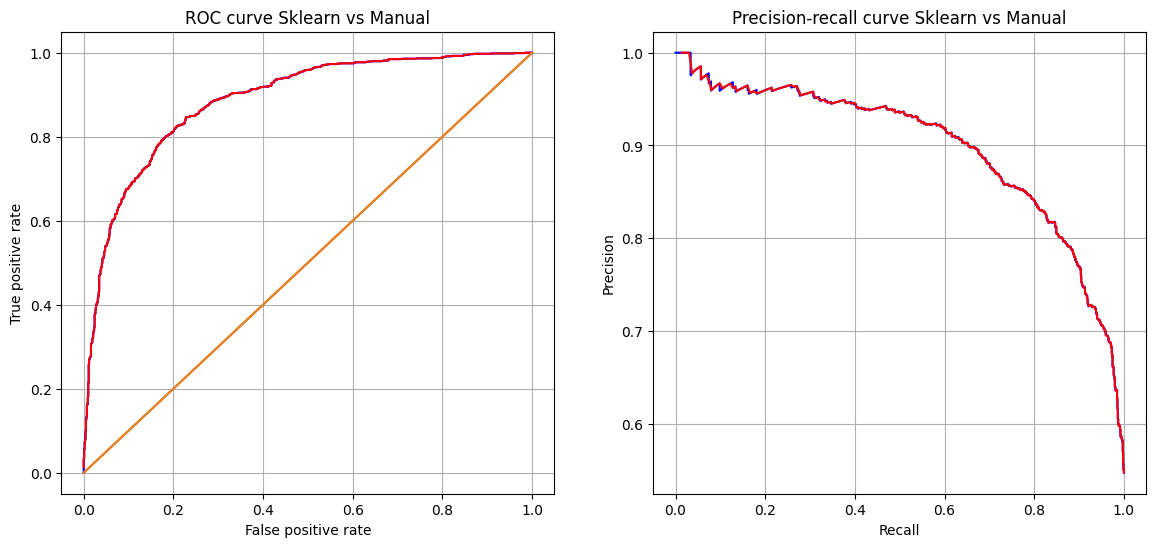

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

data = pd.read_csv('athletes.csv');

cleanData = data.dropna()

X = cleanData.loc[:,['height','weight','sport']]

X = pd.get_dummies(X, columns=['sport'], dtype='int', drop_first=True)

le = LabelEncoder()
le.fit(cleanData['sex'])
y = pd.Series(le.transform(cleanData['sex']))

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)
predictions = model.predict_proba(X_test)

tp = 0
tn = 0
fp = 0
fn = 0

for predicted_proba, actual in zip(predictions[:,1], y_test):
    if predicted_proba >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

skl_accuracy = model.score(X_test, y_test)
skl_precision = precision_score(y_test, pred),
skl_recall = recall_score(y_test, pred)

skl_roc_auc = roc_auc_score(y_test, predictions[:,1]).round(2)

fpr, tpr, thres = roc_curve(y_test, predictions[:,1])
pr, re, trh = precision_recall_curve(y_test, predictions[:,1])

fpr_man = []
tpr_man = []
precision_man = []
recall_man = []

data_len = len(predictions[:,1])

for i in range(1,1000,1):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    trh = i/1000
    for predicted_proba, actual in zip(predictions[:,1], y_test):
        if predicted_proba >= trh:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    fpr_temp = fp/(fp+tn)
    tp_temp = tp/(tp+fn)
    fpr_man.append(fpr_temp)
    tpr_man.append(tp_temp)
    precision_man.append(tp/(tp+fp))
    recall_man.append(tp/(tp+fn))

roc_auc = sum(tpr_man*abs(np.gradient(fpr_man)))

data = {
    'Manual': [accuracy, precision, recall, roc_auc],
    'Sklearn': [skl_accuracy, skl_precision[0], skl_recall, skl_roc_auc]
}

index_names = ['Accuracy', 'Precision', 'Recall', 'ROC-AUC']

metrics_table = pd.DataFrame(data, index=index_names)
print(metrics_table)

fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'hspace': 0.5})

axs[0].plot(fpr, tpr, color='blue')
axs[0].plot(fpr_man, tpr_man, color='red')
axs[0].plot(np.linspace(0,1,10), np.linspace(0,1,10))
axs[0].plot(np.linspace(0,1,10), np.linspace(0,1,10))
axs[0].set_title('ROC curve Sklearn vs Manual')
axs[0].set_xlabel('False positive rate')
axs[0].set_ylabel('True positive rate')
axs[0].grid()

axs[1].plot(re, pr, color='blue')
axs[1].plot(recall_man, precision_man, color='red')
axs[1].set_title('Precision-recall curve Sklearn vs Manual')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].grid()
